In [2]:
from __future__ import annotations

from matplotlib import pyplot as plt
import numpy as np

from processing_test import ProcessorInterface
from plotting import load_wav, plot_chunk, plot_series, SAMPLE_RATE, CHUNK_TIME, FFT_SIZE, FFT_OUT_SIZE

plt.style.use('ggplot')

interface = ProcessorInterface(window=False)

# Samples
indexes = np.arange(SAMPLE_RATE * CHUNK_TIME)
generated_samples = (
    np.sin(2 * np.pi * indexes * 900 / SAMPLE_RATE)
    + np.sin(2 * np.pi * indexes * 1200 / SAMPLE_RATE)
    + np.sin(2 * np.pi * indexes * 1800 / SAMPLE_RATE)
    + np.sin(2 * np.pi * indexes * 15000 / SAMPLE_RATE)
    + np.sin(2 * np.pi * indexes * 20000 / SAMPLE_RATE)
).astype(np.float32)
processed_generated_samples = np.array(interface.process_chunks(generated_samples), dtype=np.float32)

real_samples = load_wav("song.wav", "left")
processed_real_samples = np.array(interface.process_chunks(real_samples))
processed_real_samples = processed_real_samples.reshape(
    (len(processed_real_samples) // FFT_OUT_SIZE, FFT_OUT_SIZE),
)
processed_real_amplitudes = 10 * np.log10(processed_real_samples)

Wav params: {
	nchannels: 2,
	sampwidth: 2,
	framerate: 44100,
	nframes: 6416844,
	comptype: NONE,
	compname: not compressed,
}
Read 25667376 bytes. 4 bytes per frame


C:\Users\eloci\AppData\Local\Temp/ipykernel_54628/670802892.py:29: RuntimeWarning: divide by zero encountered in log10
  processed_real_amplitudes = 10 * np.log10(processed_real_samples)


# Generated

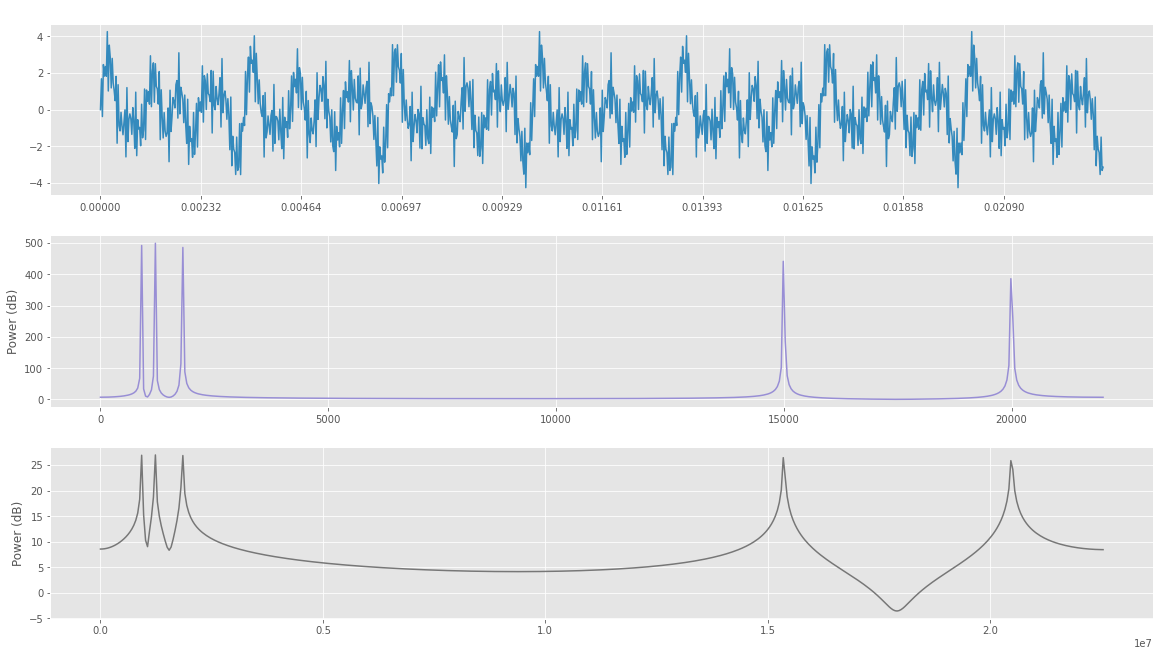

In [3]:
plot_chunk(
    0,
    generated_samples,
    processed_generated_samples,
)

# From samples

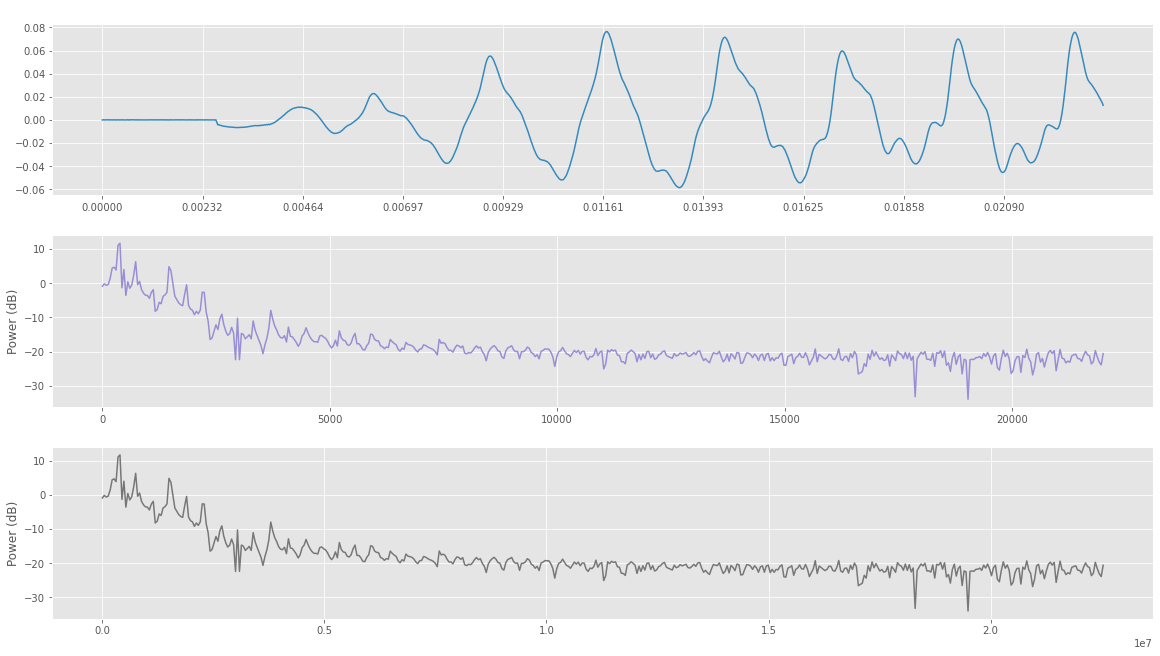

In [4]:
plot_chunk(
    0,
    real_samples[:FFT_SIZE],
    processed_real_amplitudes[0],
)

# Whole file

e:\Development\lightbox\processing_test\plotting.py:71: RuntimeWarning: divide by zero encountered in log10
  db_power = 10 * np.log10(np_ampls)


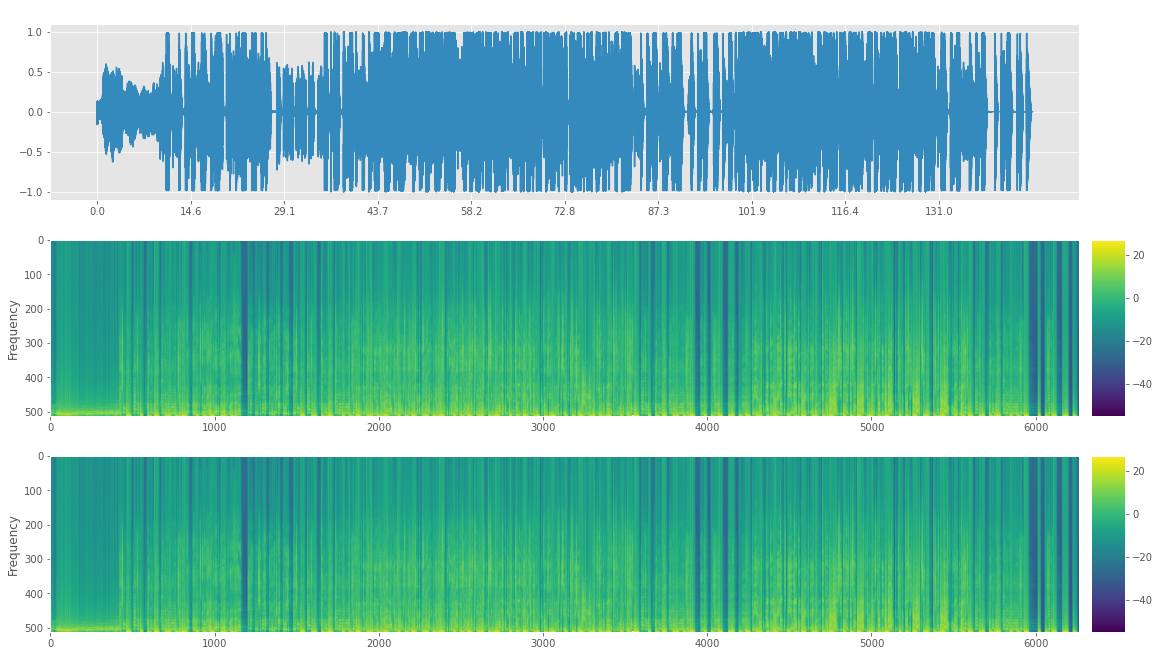

In [5]:
plot_series(0, real_samples, processed_real_amplitudes)

# 1 Second

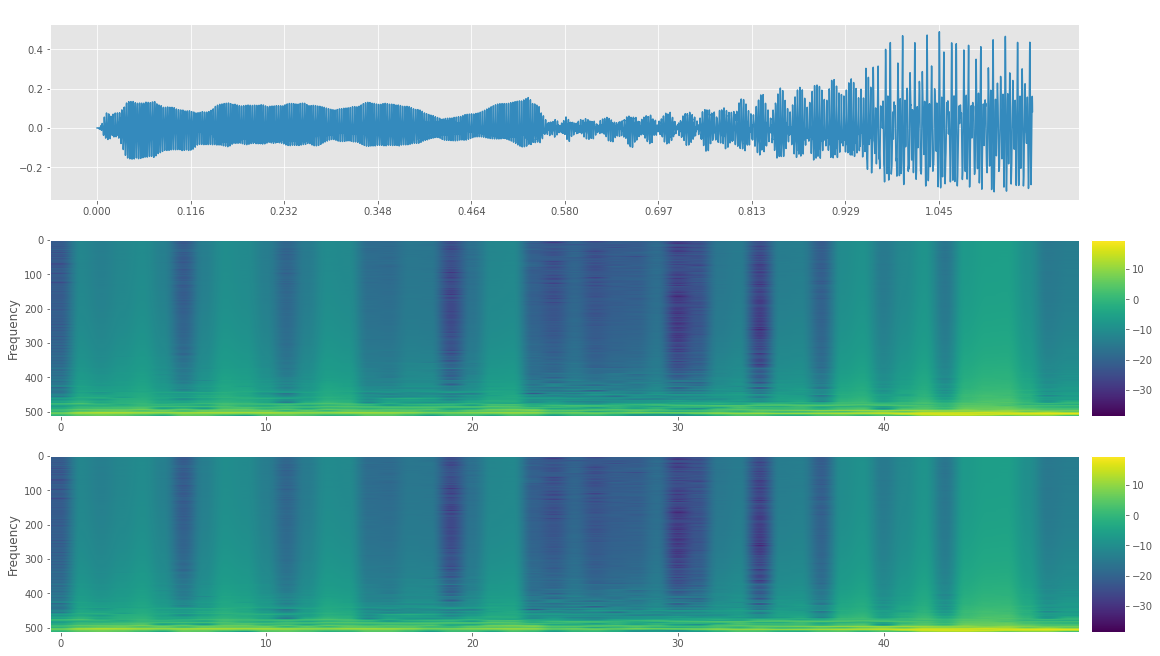

In [6]:
slice_len = 50
plot_series(0, real_samples[:slice_len * FFT_SIZE], processed_real_amplitudes[:slice_len])

# Max hold

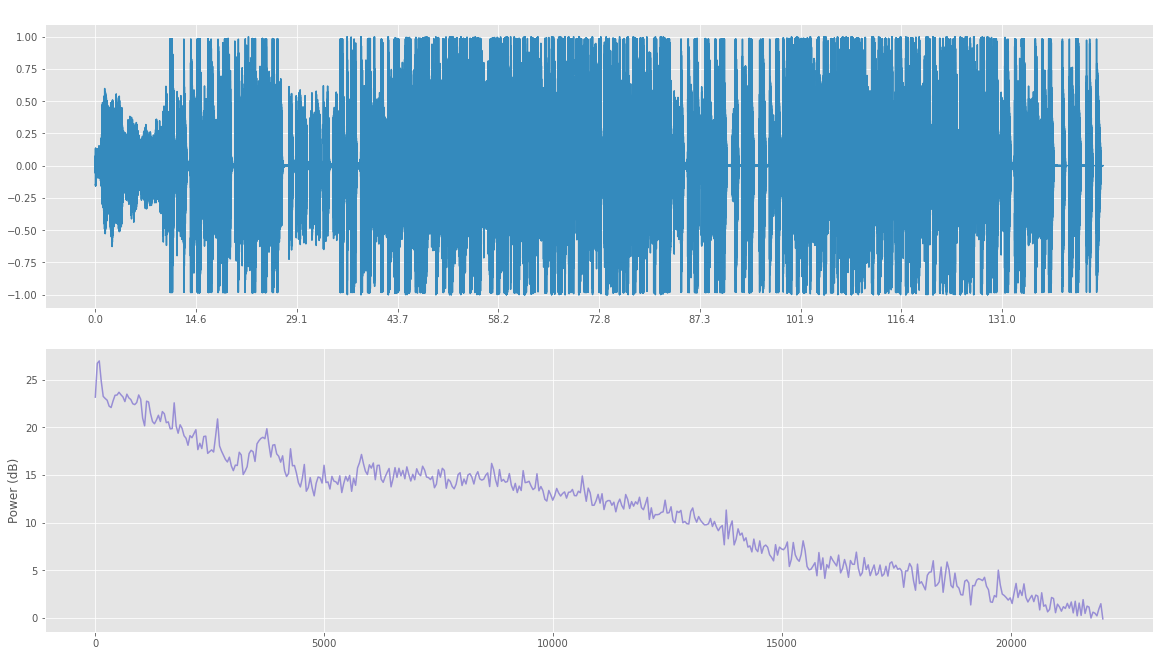

In [9]:
plot_chunk(
    0,
    real_samples,
    np.max(processed_real_amplitudes, axis=0),
    include_np=False
)